In [13]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

In [ ]:
# import rpy2
# from rpy2.robjects import pandas2ri
# pandas2ri.activate

In [2]:
# %load_ext rpy2.ipython

In [ ]:
%%capture
# Set the working directory
working_dir = "/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_SET/GSE212252"
os.chdir(working_dir)
print(f"Current working directory: {os.getcwd()}")

In [ ]:
%%capture
adata = sc.read_h5ad('./output/processed_combined_data_from_raw.h5ad')

In [ ]:
%%capture
sc.tl.leiden(adata, resolution=0.7)

In [ ]:
%%capture
# Find marker genes
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

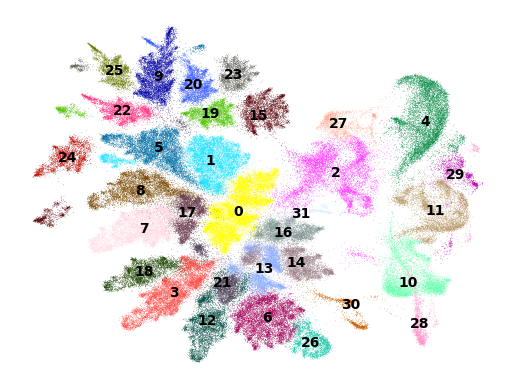

In [12]:
# Plot UMAP
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False)

In [14]:
markers_df = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)
print(markers_df)


          0         1       2         3         4       5         6         7  \
0      Apoe    Hba-a2  Malat1    Hba-a2    Frmd4a  Hbb-bt  AY036118    Hba-a1   
1     Fabp7    Hba-a1   Auts2   Gm42418     Gria2  Hba-a2   Gm42418  AY036118   
2   Gm42418    Tmsb4x    Nfia  AY036118  Mir99ahg  Hba-a1    Tmsb4x    Tmsb4x   
3    Hba-a1  AY036118     Dcc    Tmsb4x    Frmd4b  Hbb-bs      Tpt1   Gm42418   
4       Dbi      Tpt1    Nfib      Tpt1    Rbfox1  Tuba1a    Eef1a1      Tpt1   
5       Mt3   Gm42418   Ptprd     Rplp1     Celf2  Tmsb10     Rps12     Rps24   
6      Cst3     Rpl41   Epha5     Rps12   Gm26871   Stmn1     Rps29     Rps12   
7       Ptn     Rps24   Tenm4     Fabp7    Ppfia2  Eef1a1     Rps24     Rplp1   
8    Camk1d     Rps12    Nrg1     Rps24    Slc8a1    Tpt1    Tuba1a    Tuba1a   
9  AY036118     Rplp1  Setbp1     Rpl41    Plxna4  Tmsb4x     Rplp1     Rpl32   

        8       9  ...      22      23      24      25        26       27  \
0  Hbb-bt     Ttr  ...     Ttr 

# Annotate cell types based extracted marker genes from supplementary data

In [21]:
cell_type_markers = {
    'Neural Progenitor Cells': ['Sox2', 'Eomes'],  # Eomes is also known as Tbr2
    'Neurons': ['Tbr1', 'Satb2', 'Neurod6', 'Dcx', 'Cux2', 'Sema3a', 'Syn3', 'Nfasc', 'Epha5'],
    'Oligodendrocytes': ['Sox10'],
    'Astrocytes': ['Sox9'],
    'Radial Glial Cells': ['Sox2'],
    'Deep Layer Excitatory Neurons': ['Tbr1'],
    'Upper Layer Excitatory Neurons': ['Satb2'],
    'Endothelial Cells': ['Pecam1'],  # Cd31 is also known as Pecam1
    'Erythrocytes': ['Gypa', 'Tfrc']  # Ter119 is mouse-specific. Cd71 is also known as Tfrc
}

In [22]:
def score_cell_types(adata, cell_type_markers):
    for cell_type, markers in cell_type_markers.items():
        # Check which markers are present in the dataset
        present_markers = [marker for marker in markers if marker in adata.var_names]
        print(present_markers)
        
        if len(present_markers) > 0:
            sc.tl.score_genes(adata, present_markers, score_name=f'{cell_type}_score')
        else:
            print(f"Warning: No markers found for {cell_type}")

In [28]:
adata.obs.head()

,origin,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,...,Neurons_score,Oligodendrocytes_score,Astrocytes_score,Radial Glial Cells_score,Deep Layer Excitatory Neurons_score,Upper Layer Excitatory Neurons_score,Endothelial Cells_score,Erythrocytes_score,predicted_cell_type,predicted_cell_type_filtered
AAACAGCCAACCCTCC-1,0,346,346,5.849325,478.0,6.171700,34.937238,48.535565,69.456067,100.0,...,0.170435,0.000000,-0.185245,-0.630886,0.000000,-0.185245,0.000000,0.000000,Neurons,Neurons
AAACAGCCAACCTAAT-1,0,461,461,6.135565,631.0,6.448889,28.843106,42.789223,58.637084,100.0,...,0.095049,-0.056484,-0.338907,-0.611636,-0.056484,-0.338907,-0.056484,-0.056484,Neural Progenitor Cells,Neural Progenitor Cells
AAACAGCCAACTGGCT-1,0,289,289,5.669881,413.0,6.025866,40.193705,54.237288,78.450363,100.0,...,-0.186323,0.000000,-0.129095,-0.796003,-0.193642,-0.129095,0.000000,0.000000,Oligodendrocytes,Oligodendrocytes
AAACAGCCAAGCCACT-1,0,305,305,5.723585,426.0,6.056784,37.323944,51.877934,75.352113,100.0,...,-0.215649,0.000000,-0.127905,-0.410818,0.000000,-0.127905,0.000000,0.000000,Oligodendrocytes,Oligodendrocytes
AAACAGCCAAGGTCCT-1,0,389,389,5.966147,531.0,6.276643,28.813559,45.574388,64.406780,100.0,...,-0.225576,0.000000,-0.119493,-0.805256,-0.179239,-0.119493,0.000000,-0.029873,Oligodendrocytes,Oligodendrocytes


In [23]:
# Score cell types
score_cell_types(adata, cell_type_markers)

['Sox2', 'Eomes']
['Tbr1', 'Satb2', 'Neurod6', 'Dcx', 'Cux2', 'Sema3a', 'Syn3', 'Nfasc', 'Epha5']
['Sox10']
['Sox9']
['Sox2']
['Tbr1']
['Satb2']
['Pecam1']
['Gypa', 'Tfrc']


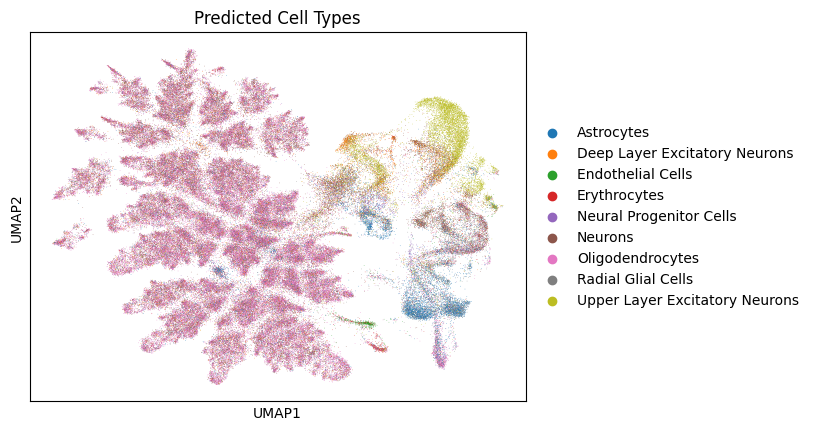

In [25]:
# Identify the cell type with the highest score for each cell
cell_type_scores = [key for key in adata.obs.keys() if key.endswith('_score')]
adata.obs['predicted_cell_type'] = adata.obs[cell_type_scores].idxmax(axis=1).str.replace('_score', '')

# Visualize the results
sc.pl.umap(adata, color='predicted_cell_type', legend_loc='right margin', title='Predicted Cell Types')


In [26]:
# Save the annotated data
adata.write('./output/annotated_data_annotation_by_markers.h5ad')

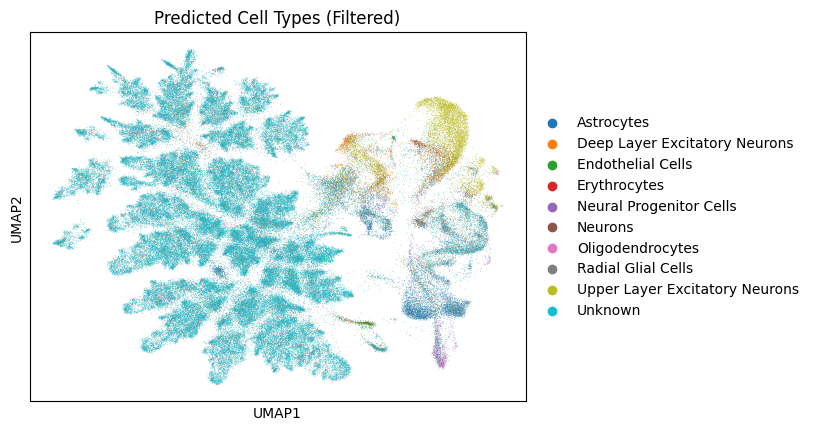

In [32]:
# Optional: to refine the annotations further, you can set a threshold
score_threshold = 0.5  # Adjust this threshold as needed

# Check if 'Unknown' is already a category
if 'Unknown' not in adata.obs['predicted_cell_type'].cat.categories:
    # Add 'Unknown' to the categories of 'predicted_cell_type'
    adata.obs['predicted_cell_type'] = adata.obs['predicted_cell_type'].cat.add_categories(['Unknown'])

# Create a new column for filtered predictions
adata.obs['predicted_cell_type_filtered'] = adata.obs['predicted_cell_type'].copy()

for cell_type in cell_type_markers.keys():
    mask = (adata.obs[f'{cell_type}_score'] < score_threshold) & (adata.obs['predicted_cell_type'] == cell_type)
    adata.obs.loc[mask, 'predicted_cell_type_filtered'] = 'Unknown'

# Visualize the refined results
sc.pl.umap(adata, color='predicted_cell_type_filtered', legend_loc='right margin', title='Predicted Cell Types (Filtered)')

In [33]:
# Print summary of cell type annotations
print(adata.obs['predicted_cell_type'].value_counts())
print(adata.obs['predicted_cell_type_filtered'].value_counts())

predicted_cell_type
Oligodendrocytes                  69895
Neurons                           35910
Astrocytes                        13805
Upper Layer Excitatory Neurons    12209
Radial Glial Cells                10552
Deep Layer Excitatory Neurons      9814
Erythrocytes                       7396
Neural Progenitor Cells            4507
Endothelial Cells                  1212
Unknown                               0
Name: count, dtype: int64
predicted_cell_type_filtered
Unknown                           110411
Upper Layer Excitatory Neurons     12081
Astrocytes                         11699
Radial Glial Cells                  9873
Deep Layer Excitatory Neurons       7086
Neurons                             4834
Neural Progenitor Cells             4163
Erythrocytes                        2668
Oligodendrocytes                    1273
Endothelial Cells                   1212
Name: count, dtype: int64


In [34]:
# Save the annotated data
adata.write('./output/annotated_data_annotation_by_markers_filtered.h5ad')